# Performing sentiment analysis

## Data Set

`Covid tweets`

The data set is as a result of a scrapping exercise by `GABRIEL PREDA` and was last updated in `2020`

[Download source](https://www.kaggle.com/datasets/gpreda/covid19-tweets)

[DOI](10.34740/kaggle/dsv/1451513)

### Data Content

Tweets with #covid19 hashtag. Collection started on 25/7/2020, with an initial 17k batch and will continue on a daily basis.

The data is in the form of `csv`



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# data set

# data path
path = "drive/My Drive/covid19_tweets.csv"

# reading the data
covidData = pd.read_csv(path)
covidData.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# Analysis

Using python natural language toolkit `NLTK`

## Initial analysis

### Vader Model

Uses `a bag of words approach`

This is a representation of text illustrating the occurrence of words within a document

It usually contains two parts

1. Vocabulary - Known words
2. Measure - presence of known words

Refereed to as a bag of words because `structure and order of words is discarded`

The analysis uses a `histogram` of the occurrence of each known word in a sentence


# Exploritory Data Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# using ggplot style plots
plt.style.use('ggplot')

# natural language toolkit
import nltk

In [4]:
# type of data being used
covidData['text'].values[0]

'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0'

In [ ]:
covidData.shape

NameError: ignored

In [5]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


<Axes: title={'center': 'Piechart of Verified Users'}, ylabel='Verified Users'>

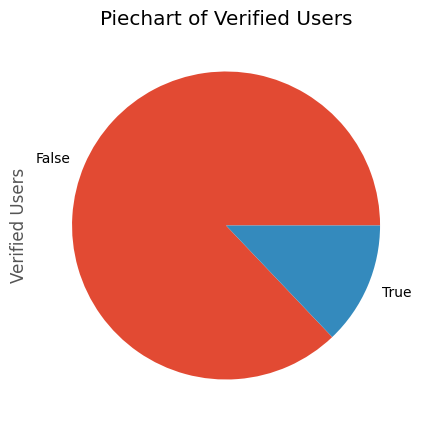

In [6]:
# posts by verified users

covidData['user_verified'].value_counts().plot( kind = 'pie',title = 'Piechart of Verified Users',
                                               figsize = (10, 5), ylabel= 'Verified Users')

In [7]:
# types of devices used by the users
device_type = covidData['source'].value_counts()

device_type

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

In [8]:
device_type['other'] = device_type.drop(['Twitter Web App',
                                        'Twitter for iPhone',
                                        'Twitter for Android']).sum()
device_type = device_type[['Twitter Web App',
                           'Twitter for iPhone',
                           'Twitter for Android',
                           'other']].fillna(0).astype(int)

device_type

Twitter Web App        56891
Twitter for iPhone     35472
Twitter for Android    40179
other                  46489
Name: source, dtype: int64

In [9]:
device_type.columns = ['Type', 'Count']
device_type

Twitter Web App        56891
Twitter for iPhone     35472
Twitter for Android    40179
other                  46489
Name: source, dtype: int64

<Axes: title={'center': 'Pie Chart of Devices Used'}, ylabel='Posts From'>

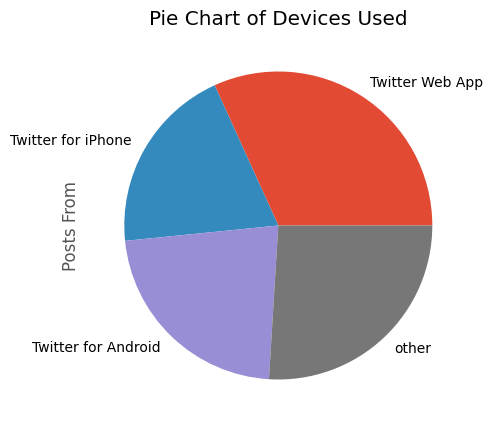

In [10]:
device_type.plot(kind ='pie',
                 title = 'Pie Chart of Devices Used',
                 figsize = (10,5),
                 ylabel = 'Posts From')

# Basic NLTK

In [11]:
# example
example = covidData['text'][50]
print(example)

Coronavirus Testing Fiasco: St Mirren have pledged to undertake an "urgent review" of their Covid-19 testing proced… https://t.co/Ifse0whbVE


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# using the nltk to split the sentence into individual words
tokens = nltk.word_tokenize(example)
tokens[:20]

['Coronavirus',
 'Testing',
 'Fiasco',
 ':',
 'St',
 'Mirren',
 'have',
 'pledged',
 'to',
 'undertake',
 'an',
 '``',
 'urgent',
 'review',
 "''",
 'of',
 'their',
 'Covid-19',
 'testing',
 'proced…']

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
# finding the part of speech for each token
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Coronavirus', 'NNP'),
 ('Testing', 'NNP'),
 ('Fiasco', 'NNP'),
 (':', ':'),
 ('St', 'NNP'),
 ('Mirren', 'NNP'),
 ('have', 'VBP'),
 ('pledged', 'VBN'),
 ('to', 'TO'),
 ('undertake', 'VB')]

In [16]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [17]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [18]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.4 MB/s eta 0:00:00


In [19]:
# group the data into chunks based on the tags

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Coronavirus/NNP)
  Testing/NNP
  Fiasco/NNP
  :/:
  St/NNP
  Mirren/NNP
  have/VBP
  pledged/VBN
  to/TO
  undertake/VB
  an/DT
  ``/``
  urgent/JJ
  review/NN
  ''/''
  of/IN
  their/PRP$
  Covid-19/JJ
  testing/NN
  proced…/NN
  https/NN
  :/:
  //t.co/Ifse0whbVE/NN)


# VADER Sentiment Scoring

Using NLTK `SentimentIntensityAnalyze` to get the `negative/neutral/positive` scores of the text

* using bag of words approach
1. stop words are removed `and, the, ...`
2. each word is scored and combined with the total score

VADER - `Valence Aware Dictionary and sEntiment Reasoner`

## Disadvantage
1. Does not account for the `relationship between words`

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progress bar tracker

sia = SentimentIntensityAnalyzer()

In [23]:
# example implementation
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

### Polarity_scores()
creates a vector from `0` to `1`

groups the scores into
1. positive
2. neutral
3. Negative

In [25]:
sia.polarity_scores('Monday is the worst day ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [27]:
# on the initial text example
sia.polarity_scores(example)

{'neg': 0.156, 'neu': 0.758, 'pos': 0.085, 'compound': -0.3612}

## Interpretation
the example statement is mostly negative as the compound score value is `-0.3612`

In [ ]:
# running polarity score on the whole data set

# Pos Tagging codes

[Pos tagging tutorial](https://www.freecodecamp.org/news/an-introduction-to-part-of-speech-tagging-and-the-hidden-markov-model-953d45338f24/#:~:text=In%20corpus%20linguistics%2C%20part-of-speech%20tagging%20%28POS%20tagging%20or,related%20words%20in%20a%20phrase%2C%20sentence%2C%20or%20paragraph.)

## Tags and Abbreviations
|Abbreviation|Meaning|
|:--|--:|
|CC|coordinating conjunction|
|CD|cardinal digit|
|DT|determiner|
|EX|existential there|
|FW	foreign word
|IN|preposition/subordinating conjunction|
|JJ|This NLTK POS Tag is an adjective (large)|
|JJR|adjective, comparative (larger)|
|JJS|adjective, superlative (largest)|
|LS|list market|
|MD|modal (could, will)|
|NN|noun, singular (cat, tree)|
|NNS|noun plural (desks)|
|NNP|proper noun, singular (sarah)|
|NNPS|proper noun, plural (indians or americans)|
|PDT|predeterminer (all, both, half)|
|POS|possessive ending (parent\ ‘s)|
|PRP|personal pronoun (hers, herself, him, himself)|
|PRP$|possessive pronoun (her, his, mine, my, our )|
|RB|adverb (occasionally, swiftly)|
|RBR|adverb, comparative (greater)|
|RBS|adverb, superlative (biggest)|
|RP|particle (about)|
|TO|infinite marker (to)|
|UH|interjection (goodbye)|
|VB|verb (ask)|
|VBG|verb gerund (judging)|
|VBD|verb past tense (pleaded)|
|VBN|verb past participle (reunified)|
|VBP|verb, present tense not 3rd person singular(wrap)|
|VBZ|verb, present tense with 3rd person singular (bases)|
|WDT|wh-determiner (that, what)|
|WP|wh- pronoun (who)|
|WRB|wh- adverb (how)|

## Description

there are a total of `179108` tweets with `13 columns`

The key columns are the `text` and the `users_name` columns

The text column reprersents the tweets posted.The following is an example

```
If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0
```

# Analysis

## Pretrained Model Comparison

### Roberta Model

sourced from `hugging face` 🤗

### Huggingface Pipeline

